In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow import keras
import matplotlib.pyplot as plt
import pathlib
import os
import shutil
import random
import PIL

In [8]:
data_dir = "/Users/lukas/GitHub/rescue_maze_2024/vision/source/"

In [9]:
batch_size = 32
img_height = 25
img_width = 25
seed = 1337
v_split = 0.2


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=v_split,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=v_split,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2331 files belonging to 4 classes.
Using 1865 files for training.
Found 2331 files belonging to 4 classes.
Using 466 files for validation.


In [46]:
#import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
#data_dir = pathlib.Path(archive).with_suffix('')
#print(data_dir)

In [56]:
class_names = train_ds.class_names
print(class_names)

['H', 'S', 'U', 'none']


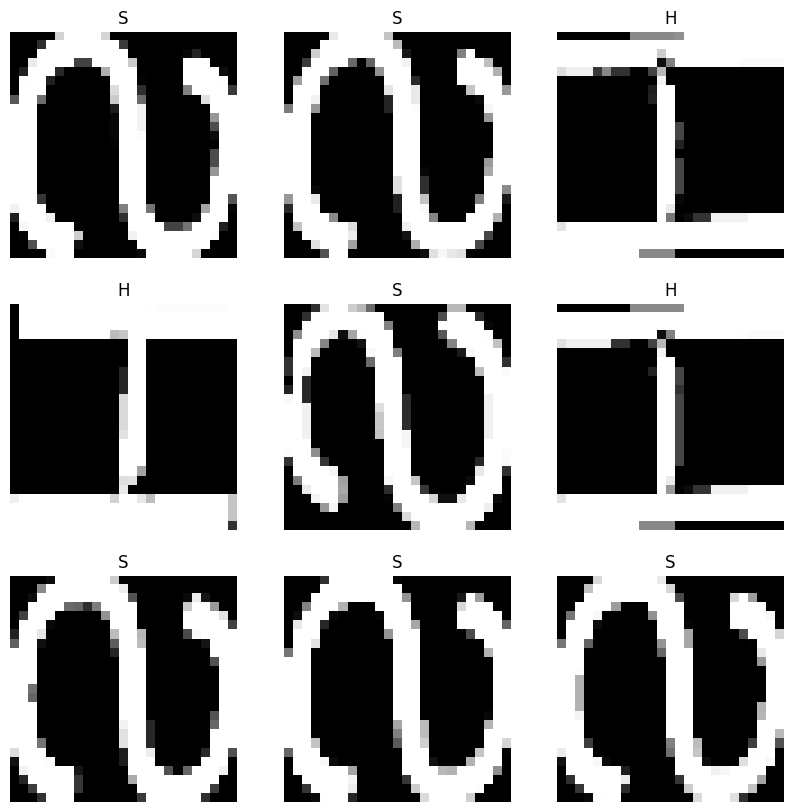

In [57]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
def create_model():
  num_classes = 4
  model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
  ])
  model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
  return model 
model = create_model()


In [11]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
59/59 [==============================] - 1s 8ms/step - loss: 0.0605 - accuracy: 0.9759 - val_loss: 7.6673e-05 - val_accuracy: 1.0000
Epoch 2/10
59/59 [==============================] - 0s 6ms/step - loss: 3.8003e-05 - accuracy: 1.0000 - val_loss: 2.5440e-05 - val_accuracy: 1.0000
Epoch 3/10
59/59 [==============================] - 0s 6ms/step - loss: 1.6588e-05 - accuracy: 1.0000 - val_loss: 1.0342e-05 - val_accuracy: 1.0000
Epoch 4/10
59/59 [==============================] - 0s 6ms/step - loss: 6.3741e-06 - accuracy: 1.0000 - val_loss: 2.9258e-06 - val_accuracy: 1.0000
Epoch 5/10
59/59 [==============================] - 0s 6ms/step - loss: 2.6844e-06 - accuracy: 1.0000 - val_loss: 1.9618e-06 - val_accuracy: 1.0000
Epoch 6/10
59/59 [==============================] - 0s 6ms/step - loss: 1.7631e-06 - accuracy: 1.0000 - val_loss: 1.3136e-06 - val_accuracy: 1.0000
Epoch 7/10
59/59 [==============================] - 0s 7ms/step - loss: 1.1497e-06 - accuracy: 1.0000 - val_loss: 8.

In [60]:
model.save_weights('./checkpoints/my_checkpoint')

In [12]:
model2 = create_model()
model2.load_weights('./checkpoints/my_checkpoint').expect_partial()
loss, acc = model2.evaluate(val_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

#model2.predict_proba(x=)

15/15 - 0s - loss: 5.6835e-06 - accuracy: 1.0000 - 175ms/epoch - 12ms/step
Restored model, accuracy: 100.00%
